In [8]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [9]:
%run 'params_paper.ipynb'
%run 'gui/model_functions.ipynb'
%run 'nash_equilibrium.ipynb'
%run 'sensitivity_analysis_paper/sensitivity_analysis_functions_paper.ipynb'

#### Generating problem specification and samples

In [11]:
names = ['d0', 'g1d', 'g2d', 'g3d', 'ne', 'impact']
bounds = [[-1, 0.5], # d0
          [-2, 2],   # a1d
          [-2, 2],   # a2d
          [-2, 2],   # a3d
          [1, 950],  # ne
          [0, 10]]   # impact
dists = ['unif'] * len(names)
outputs = ['sys_rat', 'bimodality']
int_list = [0, 0, 0, 0, 1, 0]

In [12]:
sp, n_samples, sample_dict, dup_dict = sp_and_samples(names, bounds, dists, outputs, int_list, N)

In [13]:
# put samples in excel
samples_df = pd.DataFrame(data=sample_dict)
samples_df.to_excel(f"sensitivity_analysis_paper/excel/SA_samples_{N}.xlsx")

#### Running the model

In [14]:
results = SA_results(sample_dict, n_samples, dup_dict, x_SA, n, z, 
                             P, ne, d, T, e1, d0, impact, sigma, b1, b2, b3, h_upd_chance, eta, choice_intensity)

100%|██████████| 1400/1400 [58:32<00:00,  2.51s/it] 


In [15]:
# put the results in excel
results_df = pd.DataFrame(data=results)
results_df.to_csv(f"sensitivity_analysis_paper/excel/SA_results_{N}.csv")

#### Analyze results

In [16]:
sp.set_results(results)
sp.analyze_sobol()

{'names': ['d0', 'g1d', 'g2d', 'g3d', 'ne', 'impact'],
 'groups': None,
 'bounds': [[-1, 0.5], [-2, 2], [-2, 2], [-2, 2], [1, 25], [0, 10]],
 'dists': ['unif', 'unif', 'unif', 'unif', 'unif', 'unif'],
 'outputs': ['sys_rat', 'bimodality'],
 'num_vars': 6,
 'sample_scaled': True}

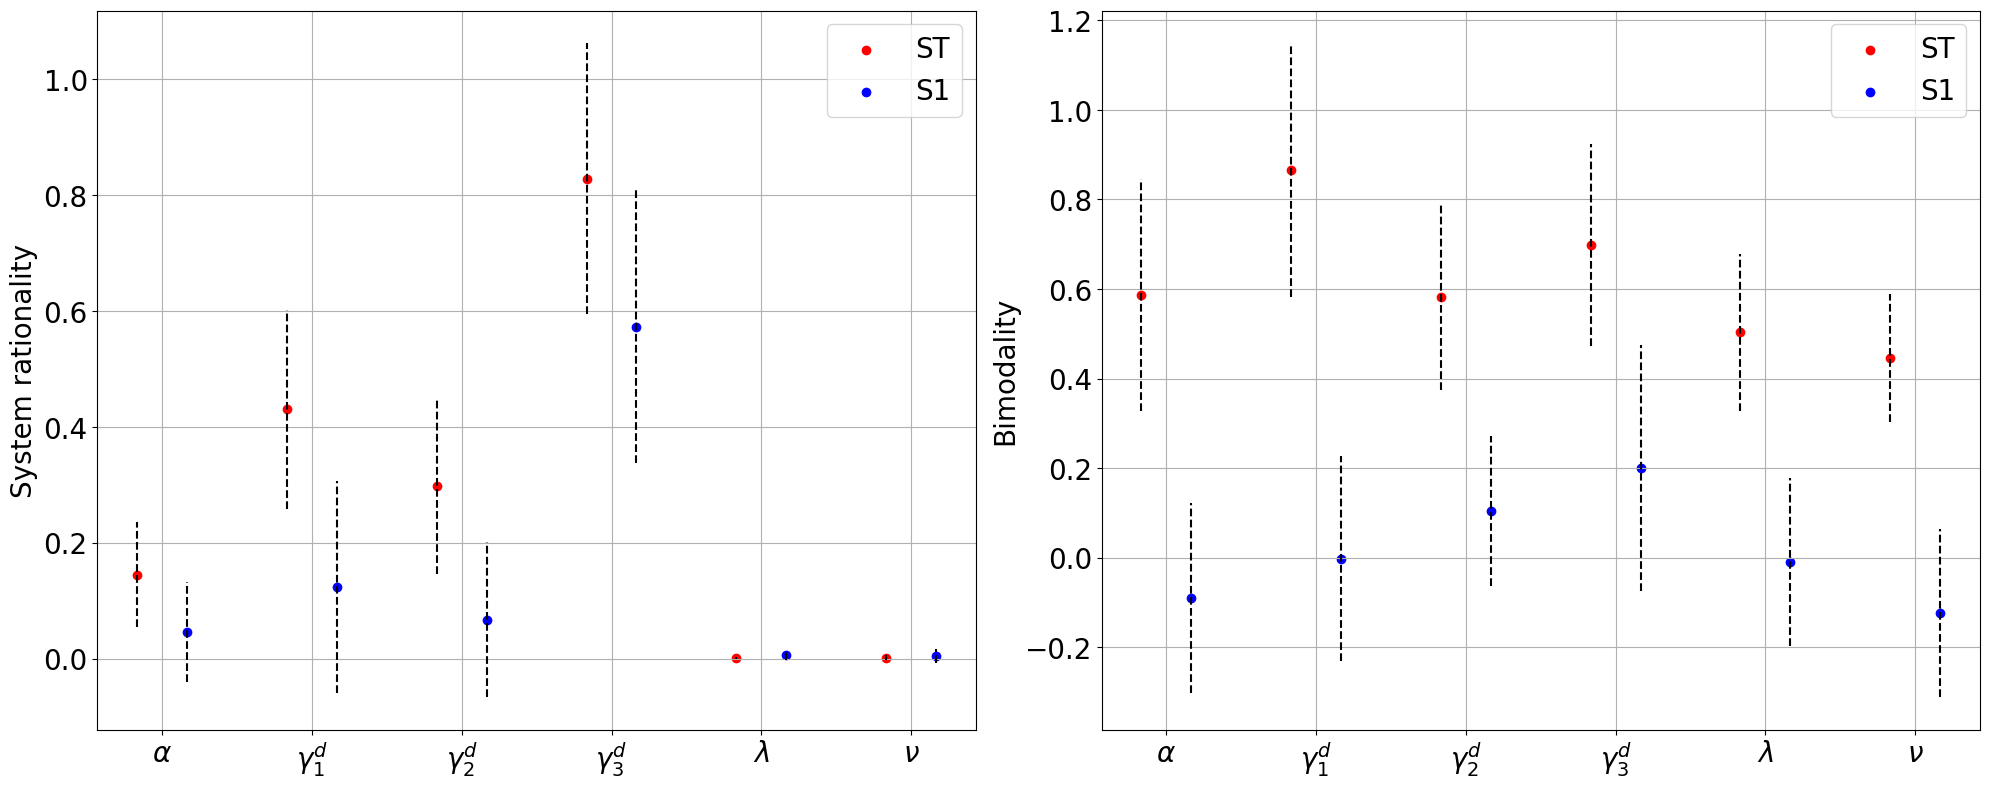

In [20]:
plot_sa_results(sp)